<a href="https://colab.research.google.com/github/2pterons/training/blob/main/MachineLearning/%ED%98%BC%EC%9E%90%20%EA%B3%B5%EB%B6%80%ED%95%98%EB%8A%94%20%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%2B%EB%94%A5%EB%9F%AC%EB%8B%9D/%EA%B8%B0%EC%B4%88%ED%8E%B8_3_2_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3-2. 선형회귀

### 지난 시간 복습

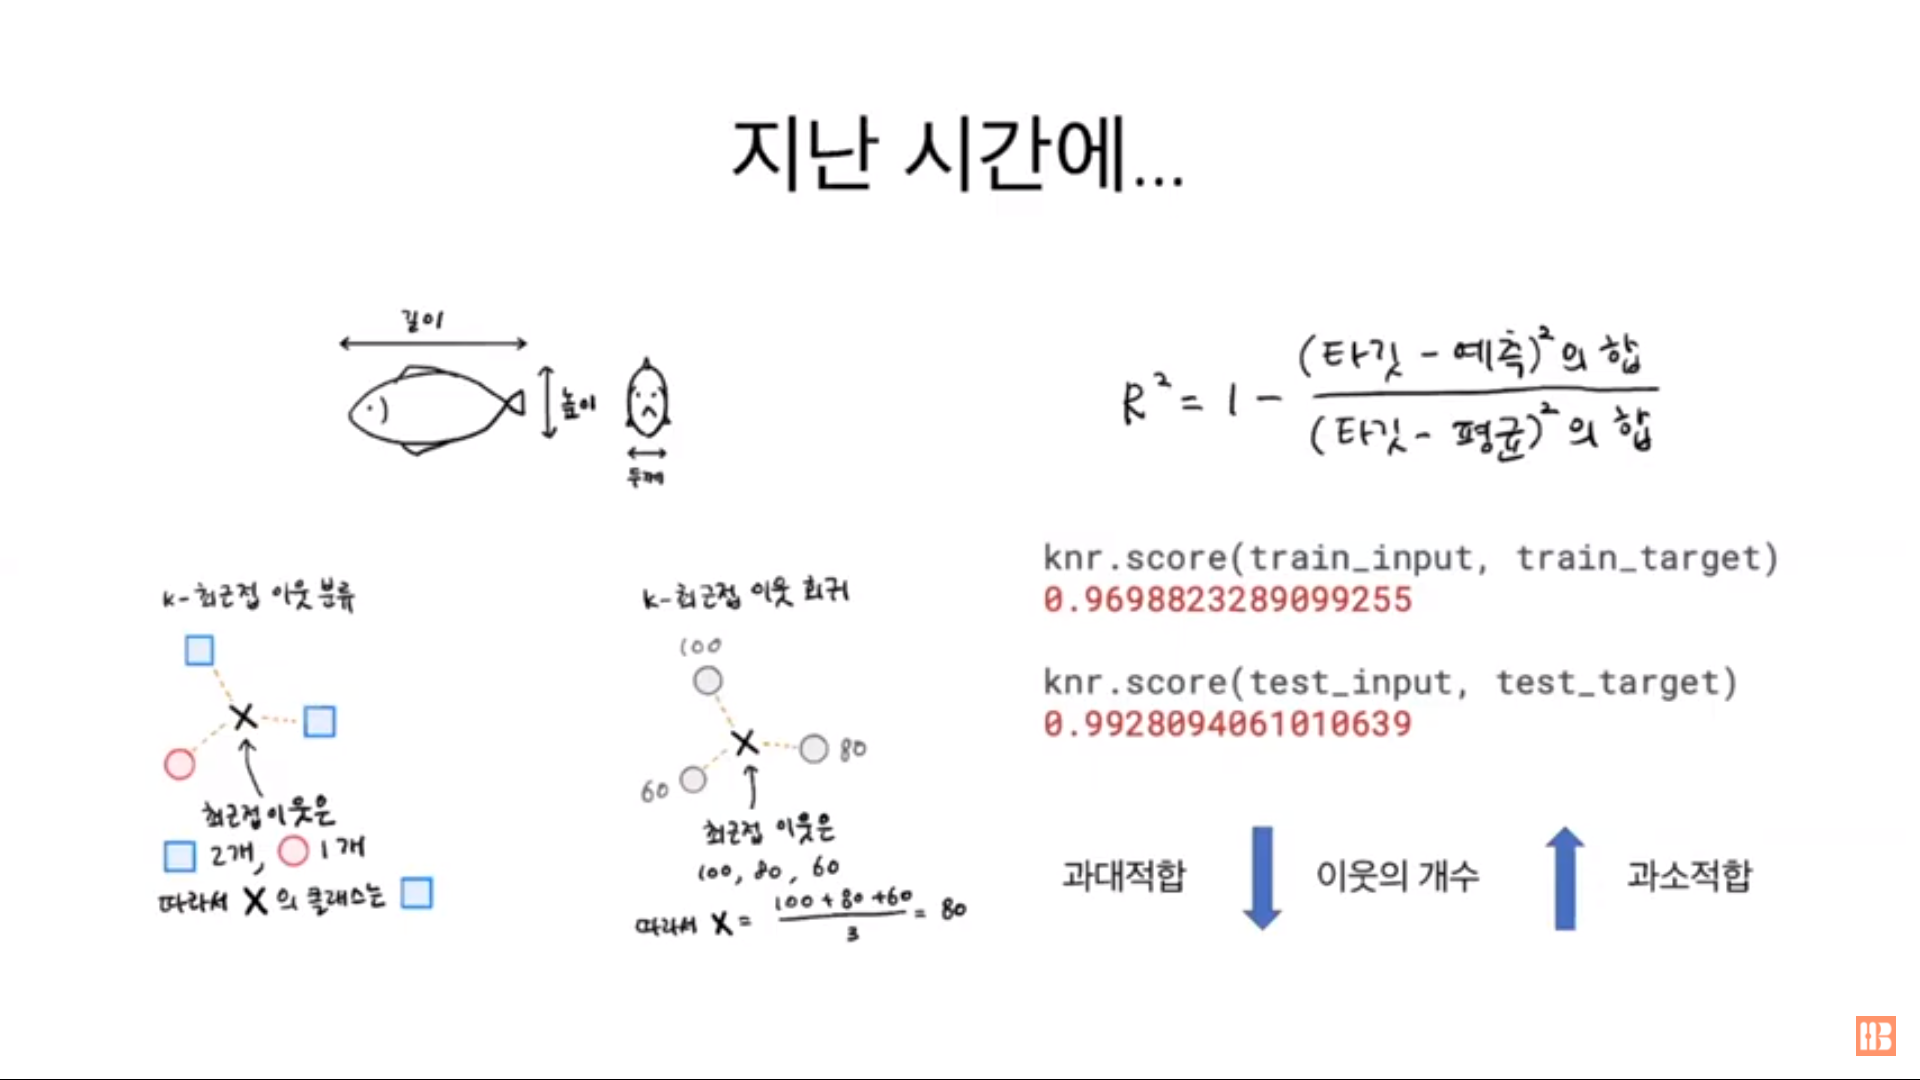

머신러닝은 ```지도학습```, ```비지도학습```, ```강화학습``` 세 종류로 나뉠 수 있으며, 그 중 지도학습은 ```분류```와 ```회귀```로 나눌 수 있다.  
분류는 여러개의 클래스 중 하나를 구분하는 작업을 말하며  
회귀는 임의의 숫자를 예측하는 작업을 말한다.  
우리는 지난 시간에 회귀 알고리즘을 알아보기 위해 농어의 길이를 사용해서 무게를 예측하는 작업을 진행했다.  
여기서 무게는 어떤 도미/빙어 등의 종류(클래스)가 아닌 100g, 105.7g 등 임의의 실수가 될 수 있기 때문에 이런 문제를 회귀 문제라고 볼 수 있다.  
따라서 우리는 지난 시간에 k-최근접 이웃 회귀 알고리즘을 사용했다.  
이보다 더 전에 배웠던 k-최근접 이웃 분류 알고리즘은 가까운 이웃 샘플의 클래스를 보고 클래스 중에 다수인 클래스를 샘플 X에 클래스로 예측하는 작업이었고,  k-최근접 이웃의 회귀 알고리즘은 이웃한 샘플을 찾는 것까지는 똑같지만 샘플의 타깃값(임의의 숫자)가 되는 것이 다른 점이다.  이 타깃값을 평균해서 샘플 x의 타깃값으로 예측한다. 이것이 바로 회귀 알고리즘이다.  



### 과대적합 과소적합

우리는 지난 시간 훈련세트의 스코어값과 테스트 세트의 스코어값을 비교했을 때, 훈련 세트에 비해 테스트 세트의 점수가 높게 나온 것을 확인 했었다.  
이것을 과소적합이라고 한다. 그리고 이와 반대되는 경우를 과대적합이라고한다.  
과소적합은 복잡도가 낮다고 말할 수 있으며,  
과대적합은 복잡도가 높다고 말할 수 있다.  
k-최근접 이웃 분류의 모델 복잡도를 조절할 수 있는 매개변수는 이웃의 갯수이다.  
이는 n_neighbors 매개변수로 조절이 가능하다.  이 매개 변수의 갯수를 늘리면 과소적합 모델이 되며, 극단적으로 전체 샘플 갯수로 사용 시 과대 적합이 되는 것을 확인할 수 있었다.(회귀든 분류든 모두 다 한가지 값으로 예측하는 단순한 모델이 된다.)     
즉, 매개변수를 줄이면, 모델이 점점 복잡해지고 훈련세트에 딱 맞게된다.( 극단적으로 이웃의 갯수를 한개만 주면 아주 가까운 훈련세트에 있는 타깃만 참고하기 때문에 훈련세트에만 맞는 모델이 되는 것) 


<br/><br/>
# 3-2. 선형회귀
## 1) 기존 모델(K-최근접 이웃 회귀)의 문제점 파악하기
### 1-1) 50cm 농어의 이웃



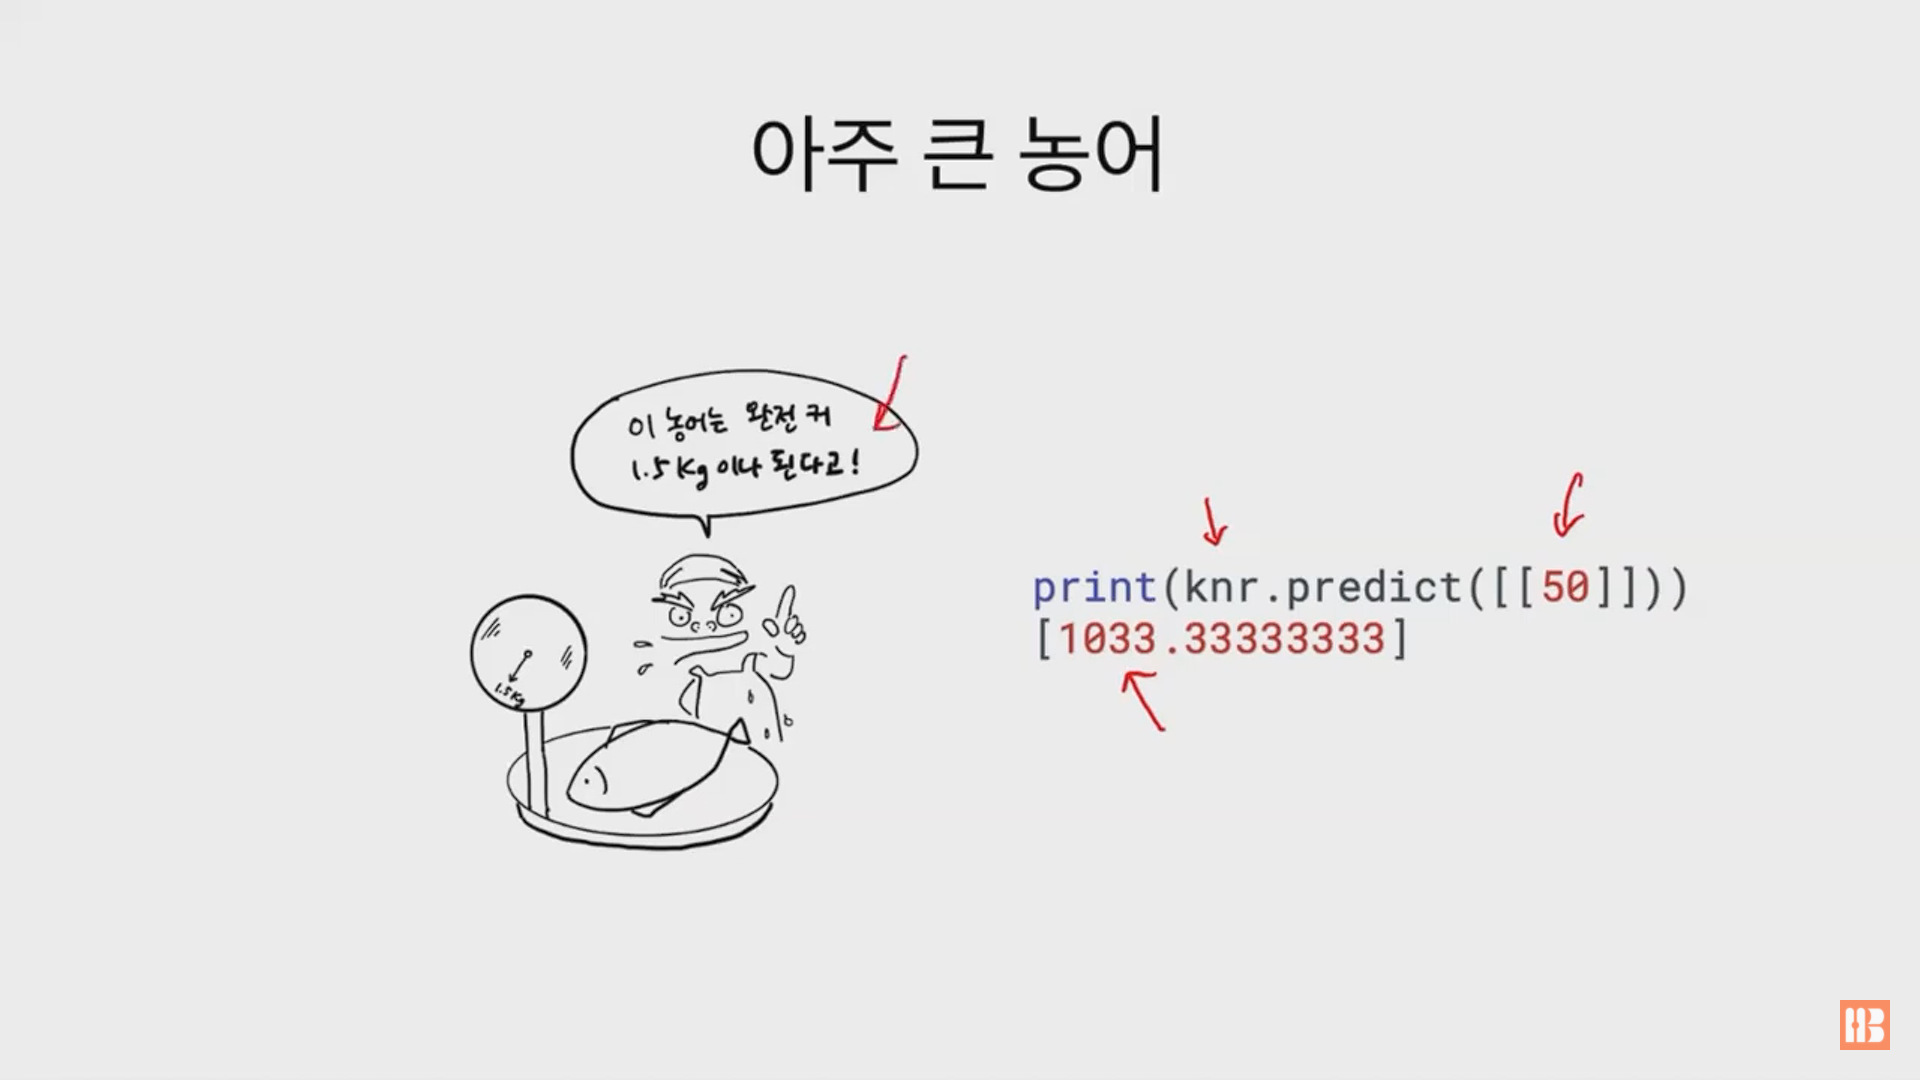

In [3]:
import numpy as np

# 농어 데이터
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
  perch_length, perch_weight, random_state=42)

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)
knr.score(test_input, test_target)

0.992809406101064

[[34 14  8 40  6]]


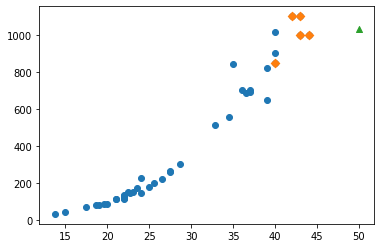

In [8]:
import matplotlib.pyplot as plt

# 50cm 농어의 이웃을 구한다.
distances, indexes = knr.kneighbors([[50]])

print(indexes)

# 훈련 세트의 산점도를 그립니다.
plt.scatter(train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만 다시 그립니다.
plt.scatter(train_input[indexes], train_target[indexes],
            marker='D')

# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.show()

kneighbors() 매서드를 이용하여 50cm농어의 최근접 이웃 5개의 샘플을 찾아보았다.  
거리는 상관없이 index값을 따로 다이아몬드로 출력한 상태이며, 오른쪽 상단에 샘플들이 최근접 이웃으로 보여진다.  
원래는 길이가 늘어나면 무게도 늘어나야하는데, 최근접 이웃은 가장 가까운 데이터를 참고해서 예측값을 만들기 때문에 극단적으로 100cm가 되는 큰 샘플을 예측하더라도 최근접 이웃은 항상 40~45cm 근방에 있는 샘플만 이웃한 샘플이 된다.  
따라서 해당 데이터에서는 물고기 크기가 100cm 정도만 되어도 최대값이 제한되어버린다.  
정리하자면 k-최근접 이웃 모델은 훈련 세트에 있는 샘플 범위 밖의 값을 예측하기가 굉장히 어렵다.  
그렇다면 이런 문제를 해결하기 위해 길이가 늘어났을 때 무게가 올라가는 추세를 따라 갈 수 있는 모델을 사용해야하고 이런 모델이 바로 이번 시간에 배울 ```선형회귀(Linear Regression)```이라고 한다.  
우리가 나중에 배울 로지스틱 회귀도 선형회귀를 기반으로 만들어졌으며 7장에서 배울 신경망 알고리즘도 선형회귀를 기반으로 하고 있다.  
그렇기 때문에 머신러닝/딥러닝 책을 볼 때 꼭 선형회귀가 먼저 나오는 경우가 많다.  


## 2) 선형회귀
### 2-1) 선형회귀에 대해서
선형회귀는 1차원 데이터가 있을 때 length만 사용한다 했을 때는 직선의 방정식만 사용한다. 따라서 아래 그림과 같이 2차원 평면에서 그릴 수 있는 선형회귀는 직선의 방정식(1차식)을 계산하는 알고리즘이다. 

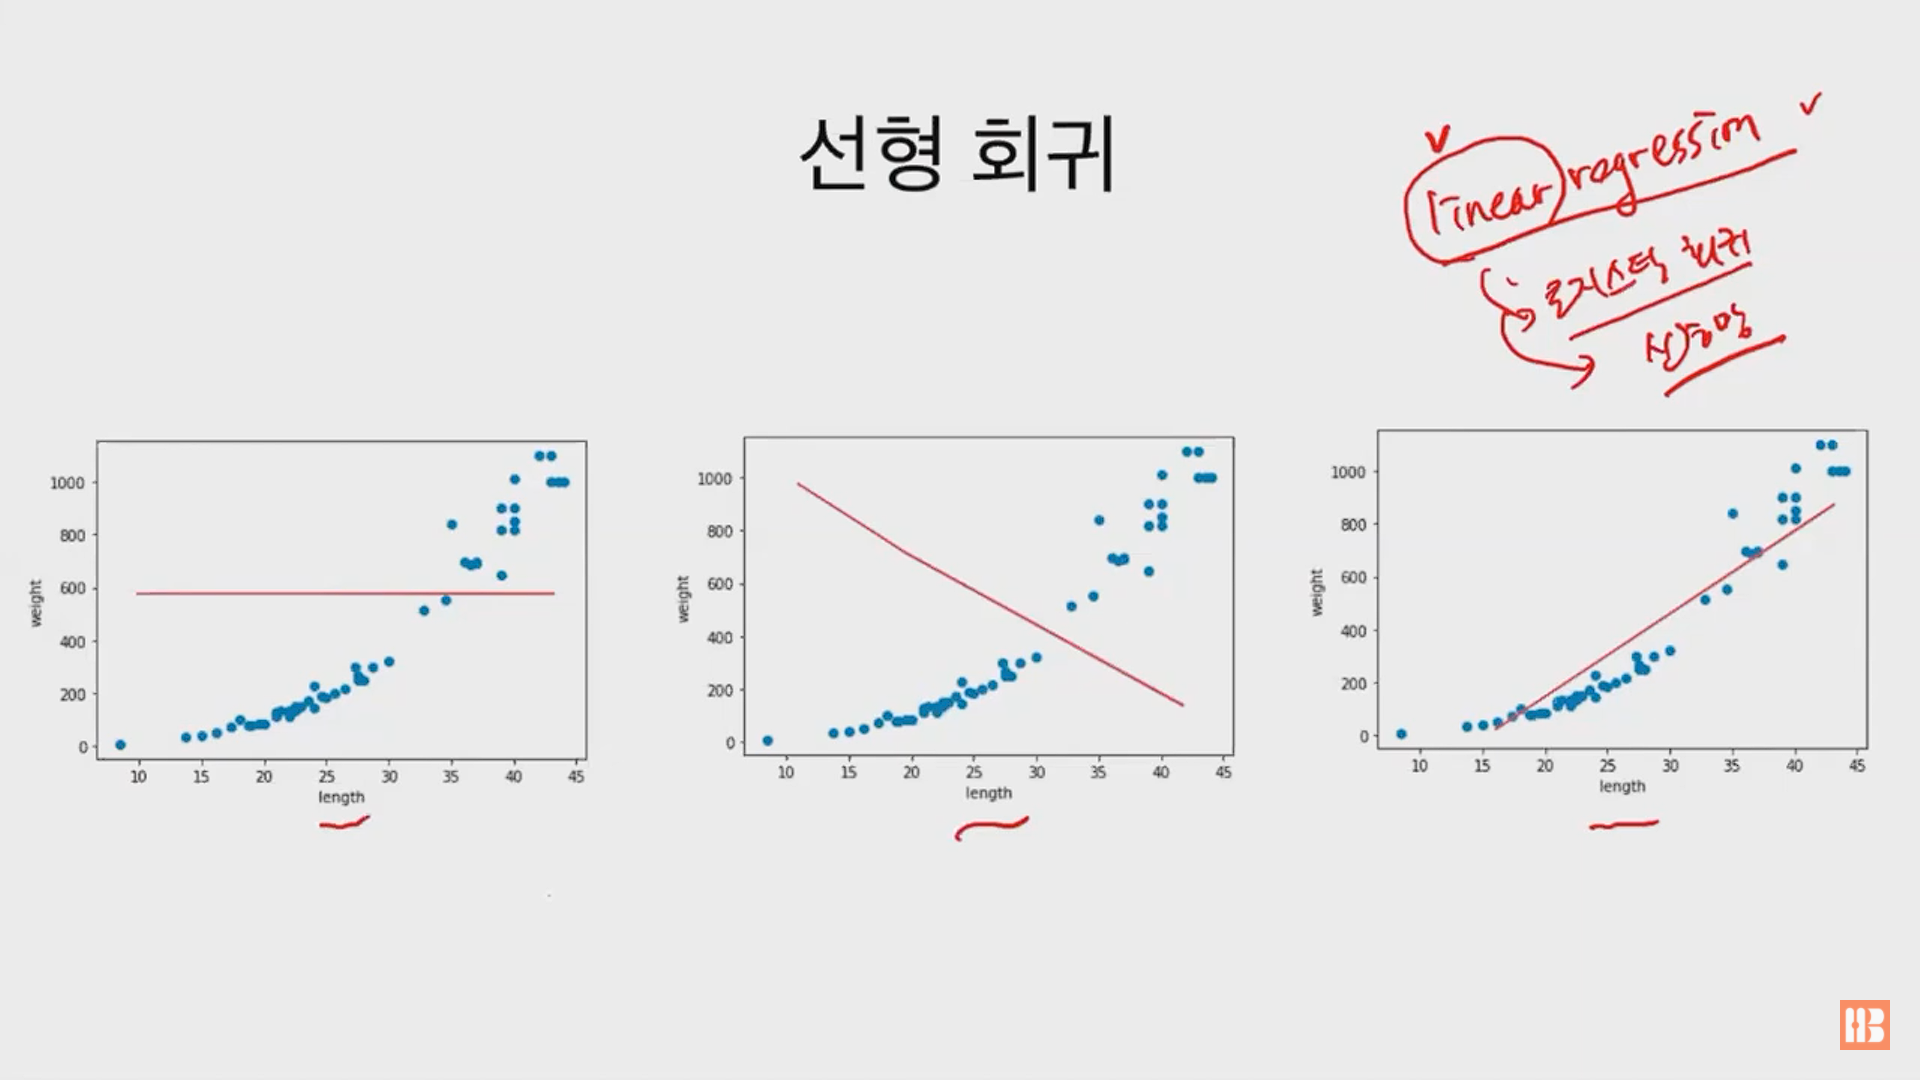

위 그림에서 3번째 그림이 농어의 길이와 타깃 무게를 잘 표현하는 추세를 따라가고 있다고 말할 수 있다.  
사이킷런에서도 선형회귀 알고리즘을 제공하며 이름은 LinearRgression으로 명칭은 동일하다.  
k-최근접이웃과 동일하게 Linearregression으로 임포트하여 선형회귀 객체를 만들 수 있다.   
사이킷런의 선형회귀 모델들은 모두다 linear_model 모듈 안에 있다.  
이후는 전과 똑같이 훈련 세트와 테스트 세트를 준비하여 fit() 매서드를 이용하여 훈련하면 된다.  


In [10]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
#선형 회귀 모델 훈련
lr.fit(train_input, train_target)

# 50cm 농어에 대한 예측
print(lr.predict([[50]]))

print(lr.coef_, lr.intercept_)

[1241.83860323]
[39.01714496] -709.0186449535477


결과 값을 보면 최근접 이웃 모델과는 다르게 추세를 잘 따라가는 것을 확인할 수 있다.  
선형 모델이 학습한 것은 직선인데 아래 그림과 같이 계산이 가능하다.  

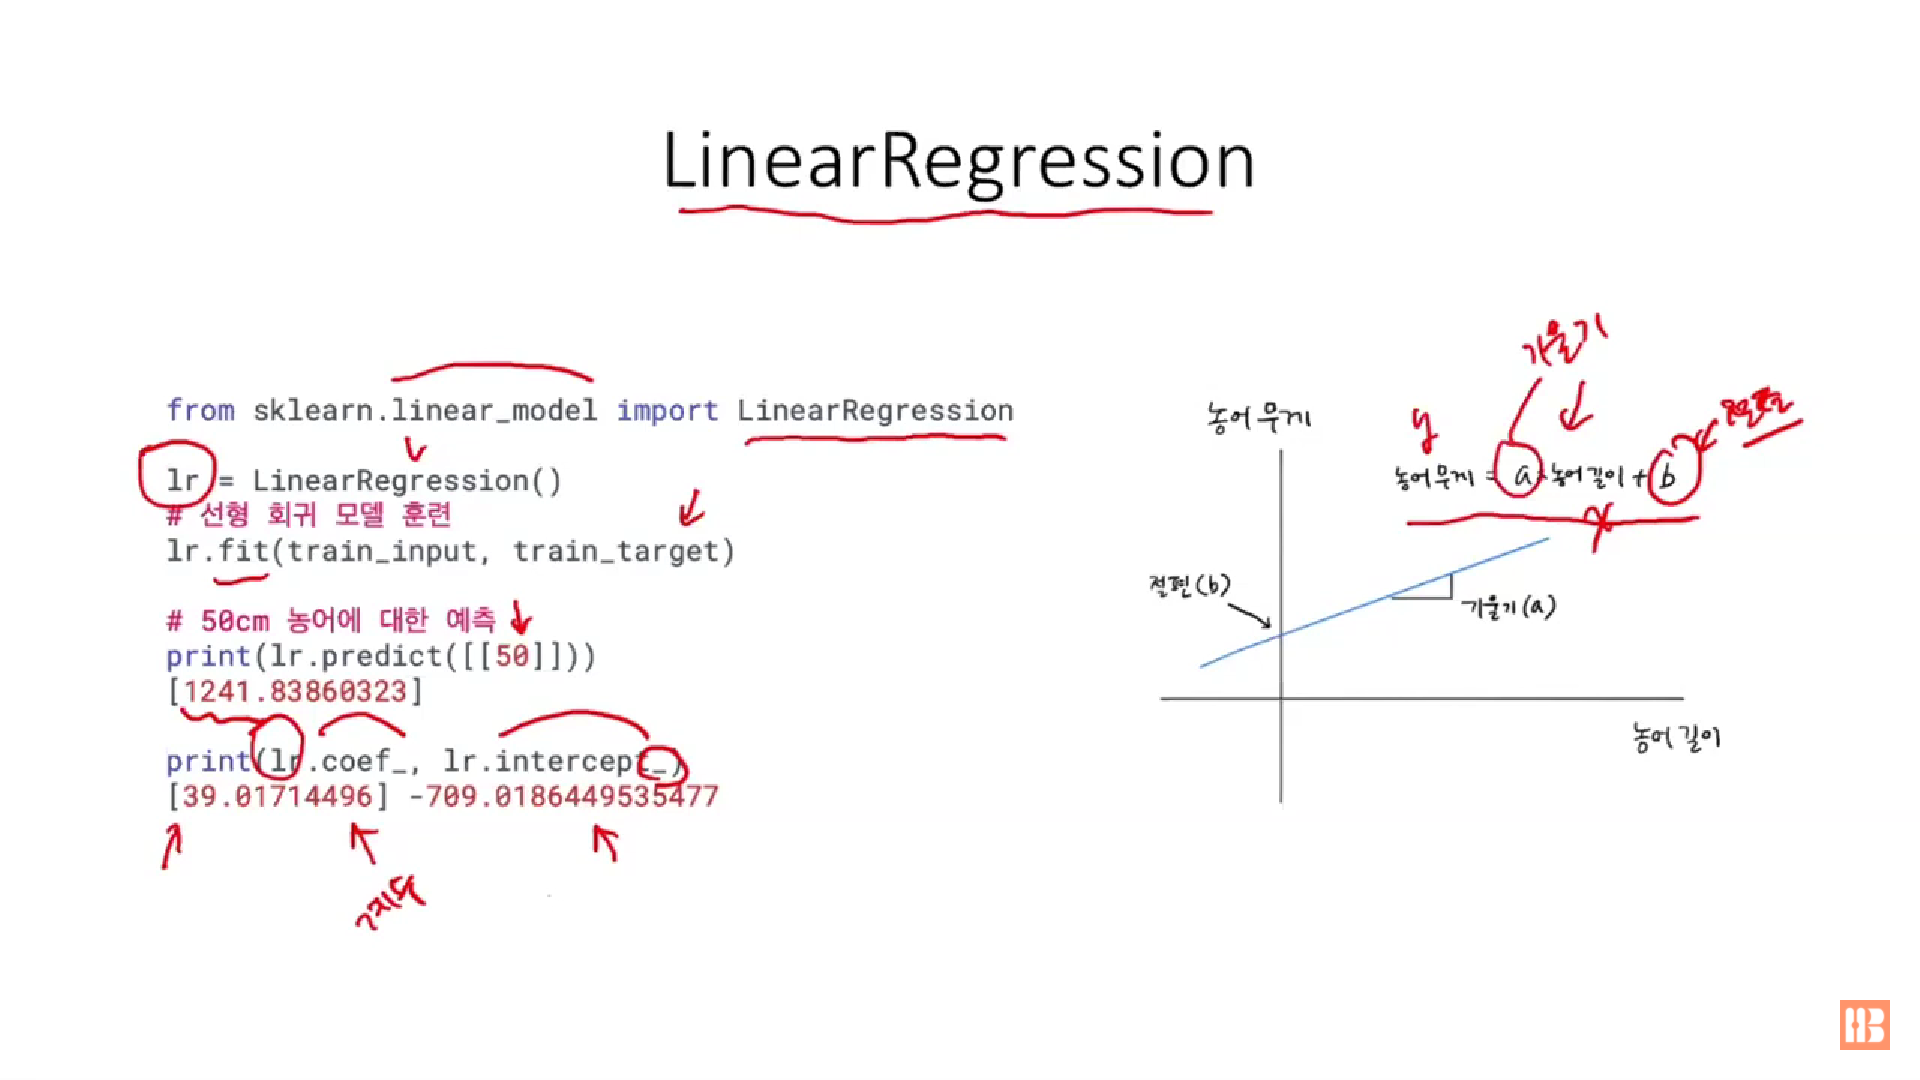

a는 기울기 b는 y의 절편(y의 축과 만나는 값)이다.  
사이킷런 모델은 학습한 값들을 저장할 때, 다른 속성과의 구분을 위해 속성이름 끝에 밑줄문자를 추가한다. 따라서 내가 지정한 값이 아니라 해당 모델이 무언가를 학습한 값으로 이해하면 된다.  
coef\_는 기울기, intercept\_는 절편이다.  
y절편은 하나기 때문에 스칼라 값(일반 실수)으로 나오고, 기울기 값은 리스트 값(넘파이 배열)로 나온다. 그 이유는 길이 특성을 하나만 사용했지만 사실 여러개의 특성을 사용할 수 있기 때문이다.  따라서 coef_ 값은 배열로 나온다.    

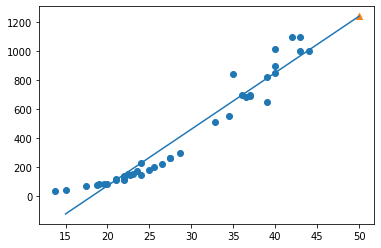

0.939846333997604
0.8247503123313558


In [11]:
# 훈련 세트의 산점도를 그립니다.
plt.scatter(train_input, train_target)

# 15에서 50까지 1차 방정식 그래프를 그립니다.
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.show()

print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

위 결과를 통해 알 수 있는 것은 과소적합과 과대적합의 가능성이다. 훈련세트의 결과를 통해서 과소적합의 가능성을 확인할 수 있었고, 훈련세트와 테스트세트의 결과를 통해 과대적합의 가능성을 엿볼 수 있다.  
또한 왼쪽 끝부분의 데이터를 보면 0보다 작은 것을 확인할 수 있다. 예를 들자면 농어의 새끼로 예측을 할 경우 이런 결과가 나올 수 있다. ??  현실적으로는 매우 어색한 결과이다..  앞에서 봤던 intercept_는 음수이기 때문에 현실적으로는 매우 어색한 결과가 나왔다.  
또한 데이터가 직선보다는 약간 굴곡진 2차 함수 형태를 띄고 있다 따라서 직선보다는 2차 함수로 만들었을 때 성능이 올라갈 것으로 보이며 음수로 떨어지는 결과도 방지할 수 있을 것이다.  
그렇다면 이번에는 2차 함수 방정식 모델을 선형회귀로 어떻게 만드는지 알아보자.

<br/><br/>
### 2-2) 다항회귀

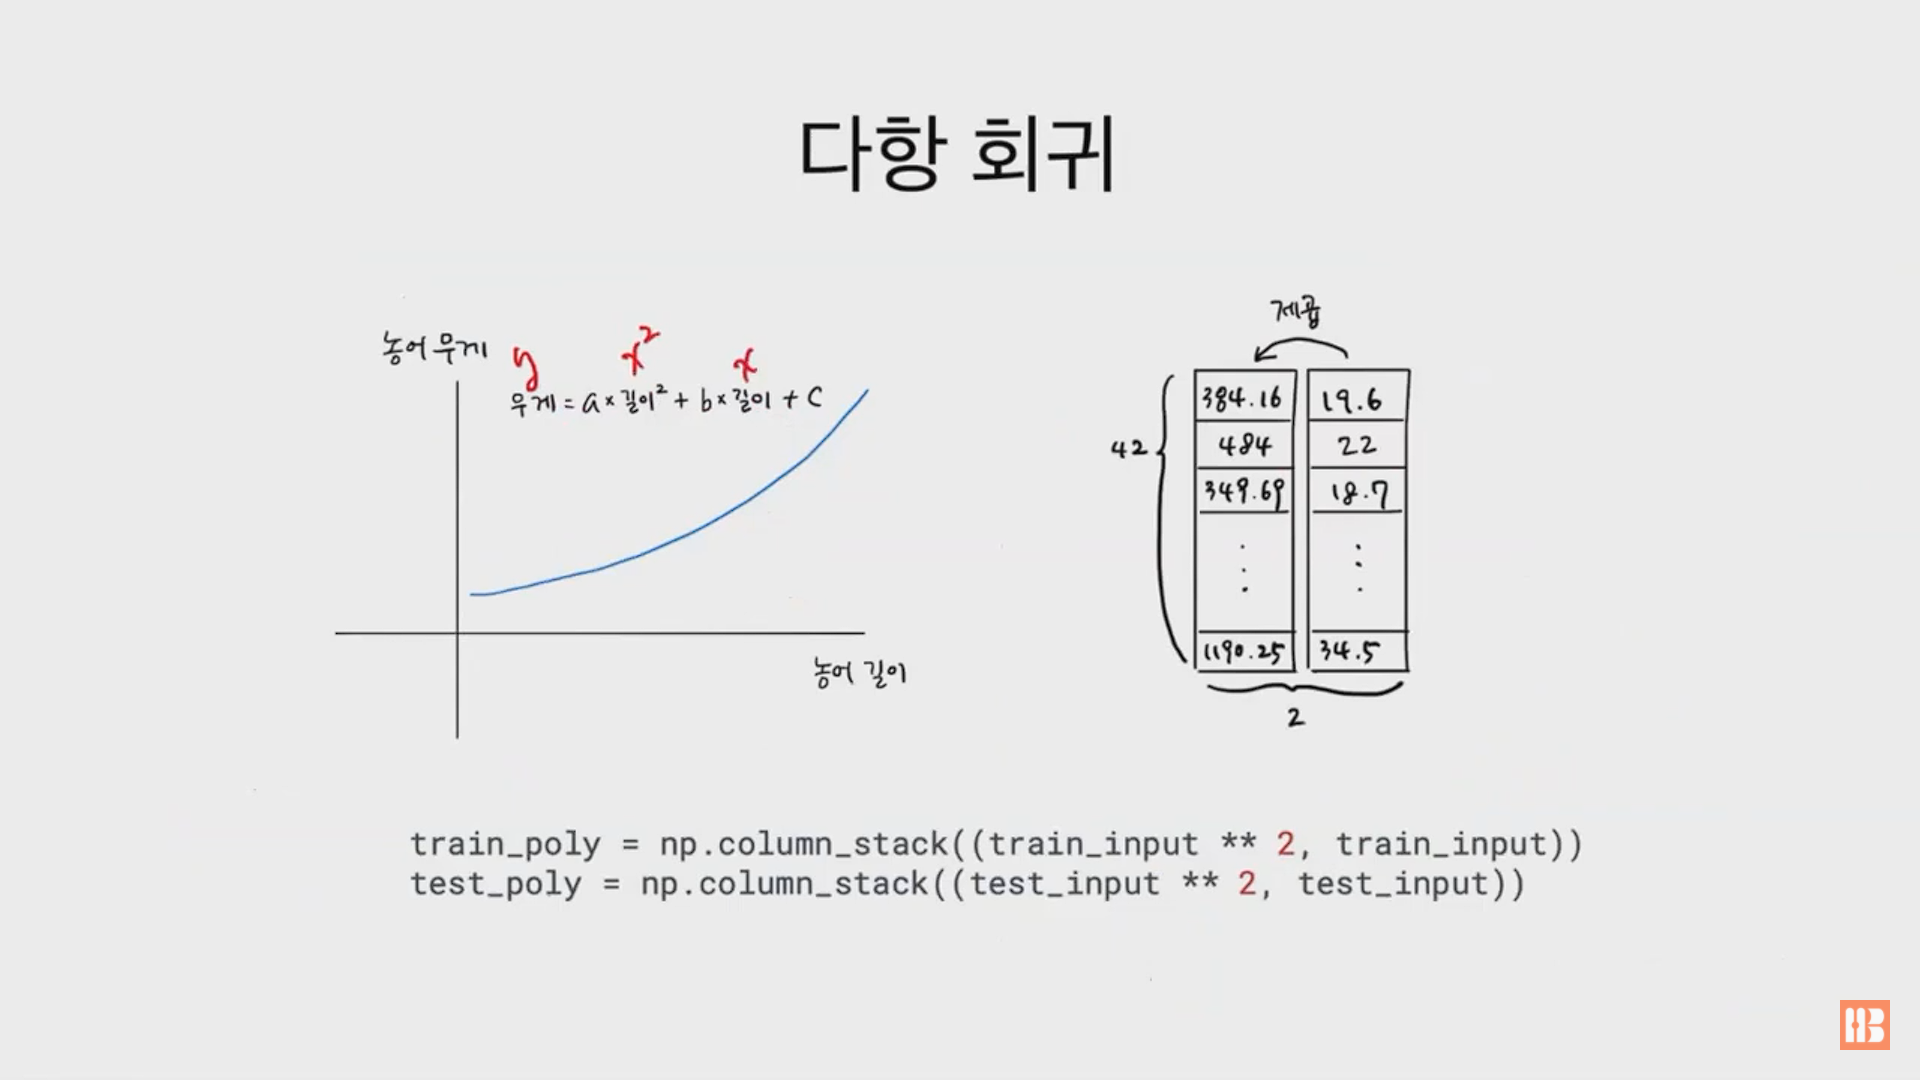

위 그림과 같이 무게를 y로 두고, 길이를 x로 두면 다음과 같은 식이 완성된다.  
이런 다항식을 가정하고 a,b,c를 구한다면 농어 데이터에 잘 맞는 2차식 그래프를 학습할 수 있다.  
따라서 x\*\*2 현을 만들어서 아까 봤던 LinearRegression() 클래스에 넣어주면 다항 회귀를 자동으로 구현할 수 있는 것이다.  
우리는 이미 길이 데이터를 가지고 있으니 길이\*\*2 데이터를 하나 더 추가해주자.

In [16]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input **2, test_input))

In [17]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2, 50]])) # x**2값은 앞서 만든 훈련세트 데이터와 동일한 순서로 넣어준다. 
print(lr.coef_, lr.intercept_)

[1573.98423528]
[  1.01433211 -21.55792498] 116.05021078278276


훈련세트 만들었을 때의 차수(제곱항)를 만들었 던 것을 그 순서 그대로 테스트 세트나 혹은 새로운 샘플에 만들어주면 된다.

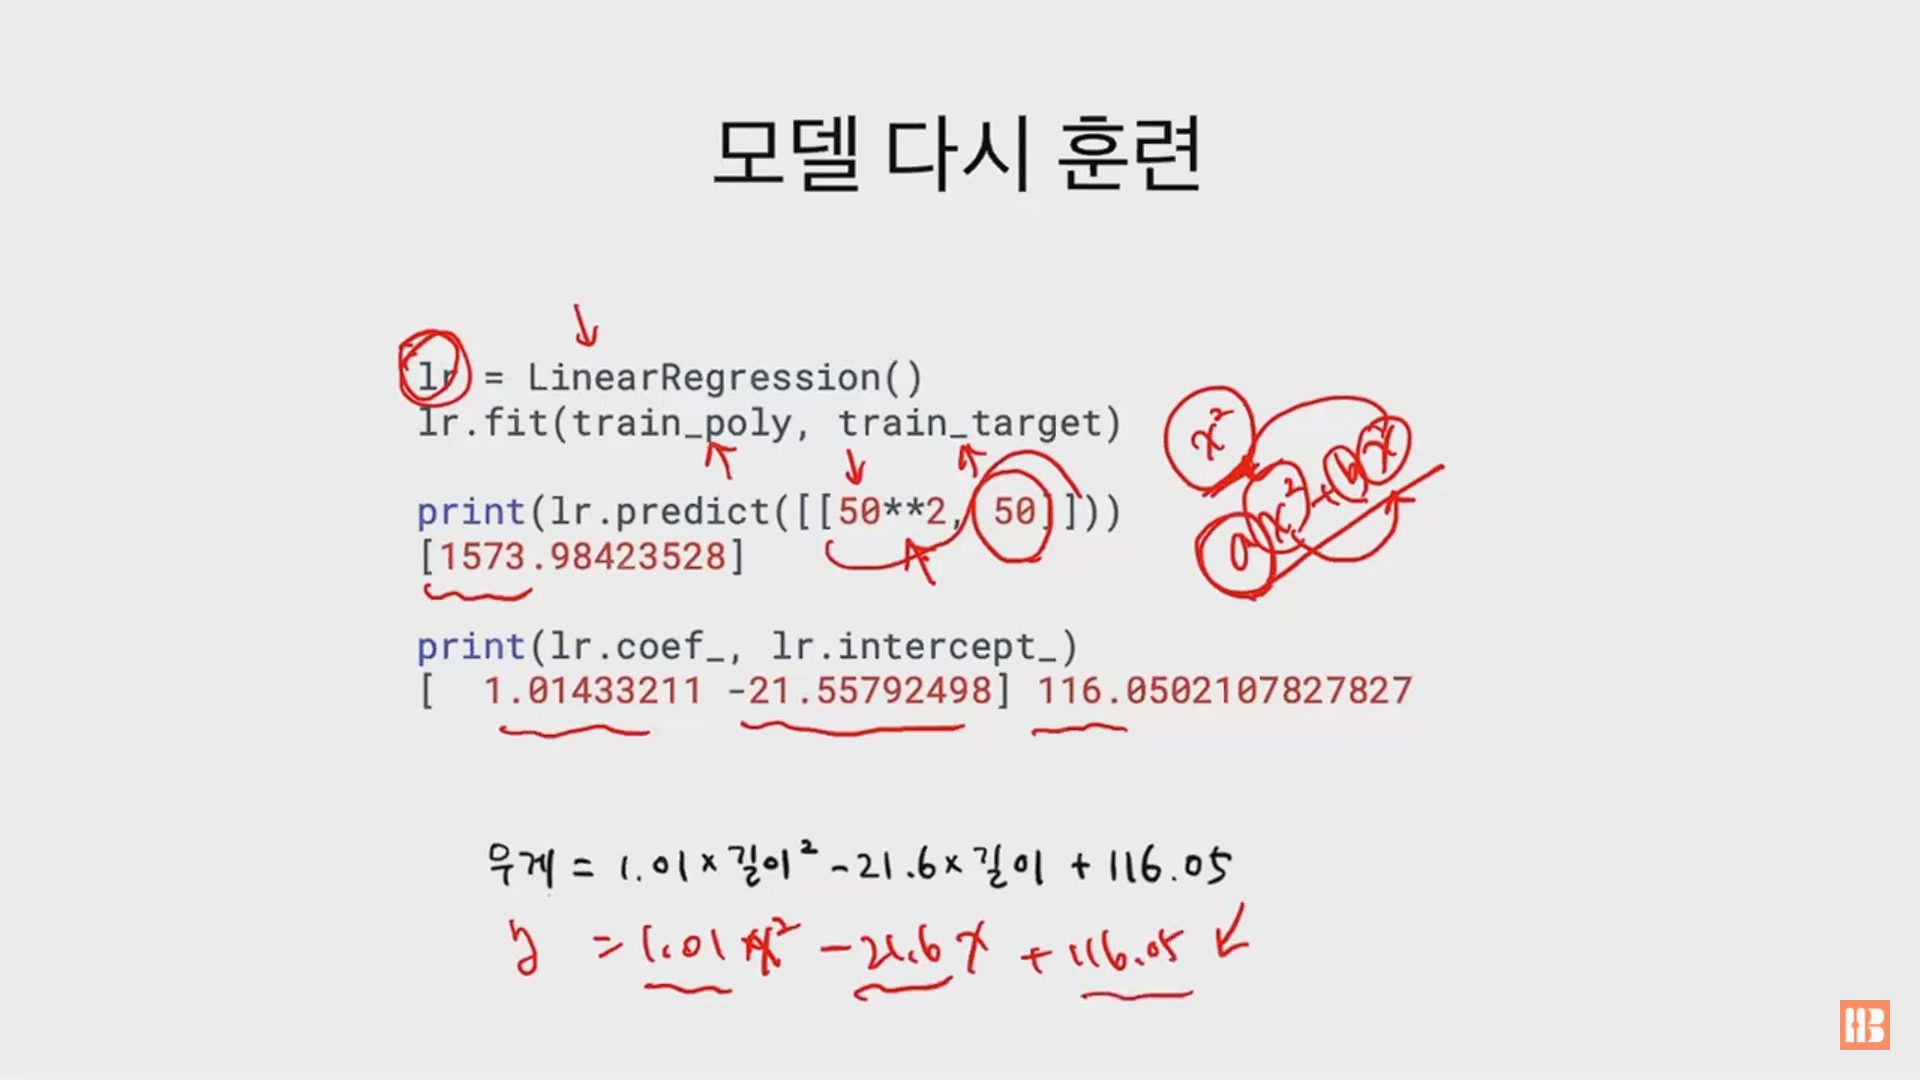

계수 1.01, -21.6과 절편 116.05를 얻을 수 있었다.  
이번에는 산점도를 그린 후에 2차식 그래프를 그려 잘 훈련되었는지 확인을 해보자
(학습한 직선을 그려보도록하자)  
간단하게 그리는 방법은 직선을 잘게 쪼개서 조금씩 그리는 것이다.  
따라서 15에서 50까지 1씩 자른 배열을 만들 것이다. 이것을 포인트 배열이라고 한다.  



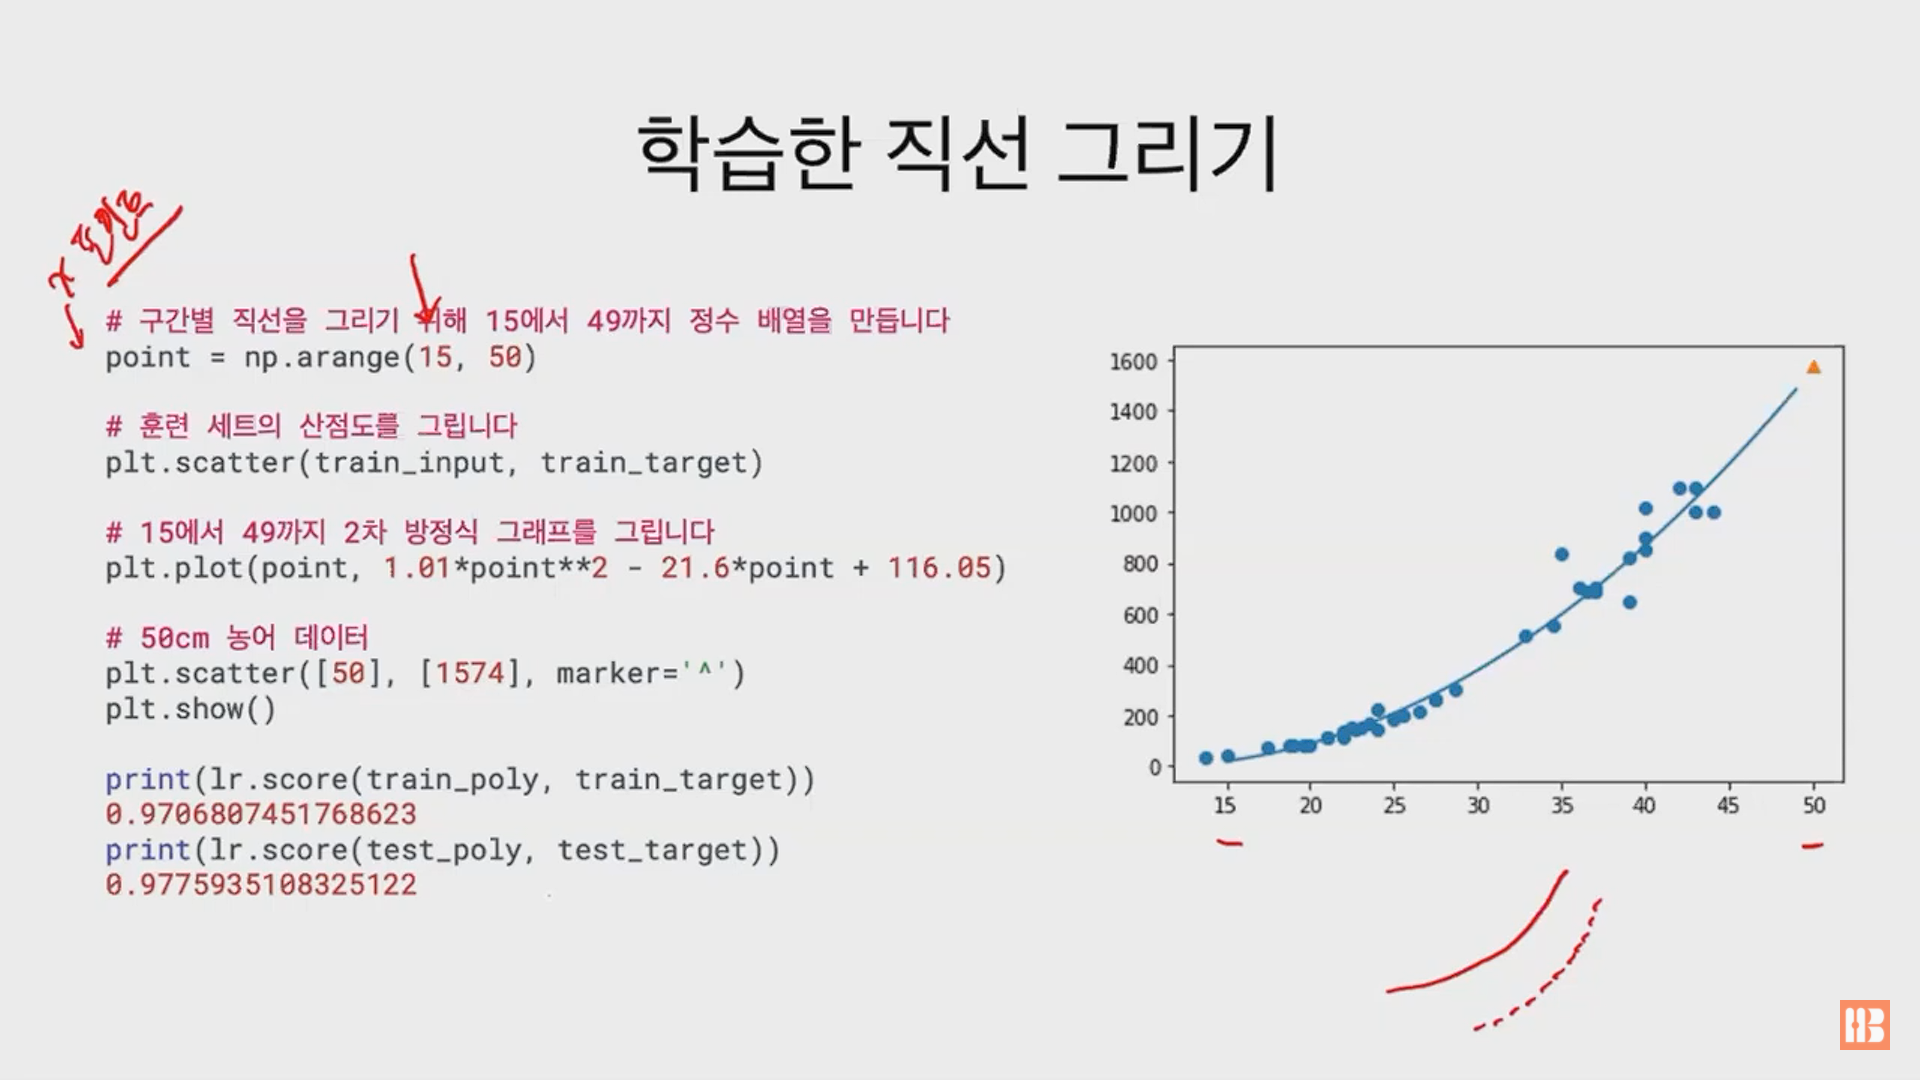

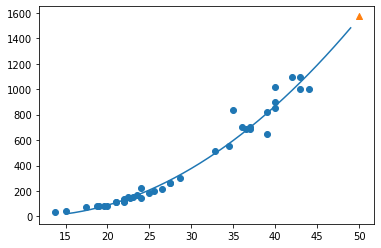

0.9706807451768623
0.9775935108325121


In [18]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듭니다.
point = np.arange(15, 50)

# 훈련 세트의 산점도를 그립니다.
plt.scatter(train_input, train_target)

# 15에서 49까지 2차 방정식 그래프를 그립니다.
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)
# <x축은 point값으로 주고 y축은 앞에서 나온 기울기값들과 절편값으로 사용한다.> 
# 1.01*point**2 - 21.6*point + 116.05

# 50cm 농어 데이터
plt.scatter([50], [1574], marker='^')
plt.show()

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

결과는 선형회귀보다 모델의 성능이 전반적으로 높은 것을 볼 수 있다.  
하지만 훈련세트의 점수가 테스트세트의 점수보다 조금 더 높은 것으로 보인다.  
따라서 모델을 조금 더 복잡하고, 훈련세트가 더 잘 맞는 조금 더 과대적합 시킨 모델을 훈려시킬 필요가 있다.  
  